In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# 1. Read the data

In [2]:
churn_df=pd.read_csv('telecom_churn_data.csv')
churn_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


# 2. Seperating Categorical and Numerical Columns

In [15]:
cat=churn_df.select_dtypes(include='object').columns

num=churn_df.select_dtypes(exclude='object').columns
cat,num

(Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object'),
 Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
        'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
        'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
        'customer_support_calls', 'churn'],
       dtype='object'))

# 3. Data Quick Checks

In [3]:
churn_df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [4]:
churn_df.tail()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,2015,999961,414-1496,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


In [6]:
churn_df.shape

(2000, 16)

In [10]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [12]:
churn_df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

# 4. Null Value Analysis
**Filling null values of Categorical Column Gender with Mode**

In [18]:
mode = churn_df['gender'].mode()[0]  # Get the first mode value
churn_df['gender'].fillna(mode, inplace=True)  # Fill NaN values with the mode

**Filling Null values of Numerical Columns "Maximum_days_inactive" and "Churn" with Median**

In [34]:
churn_df['maximum_days_inactive'].fillna(churn_df['maximum_days_inactive'].median(), inplace=True)
churn_df['churn'].fillna(churn_df['churn'].median(), inplace=True)

In [37]:
churn_df.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

# 5. Drop some unwanted data

In [39]:
churn_df.drop(columns=['year','customer_id','phone_no'], inplace=True)

In [40]:
churn_df.isnull().sum()

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

# 6. Data preprocessing (If Required)

# 7. Categorical Column Analysis

In [42]:
cat

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

Gender Frequency:
 Male      1077
Female     923
Name: gender, dtype: int64


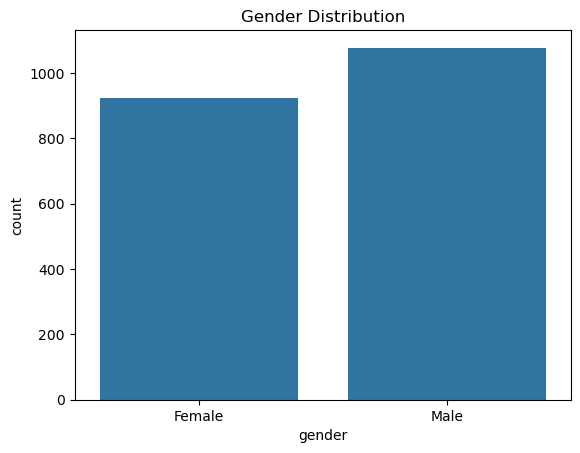

In [46]:
# Frequency Distribution
gender_counts = churn_df['gender'].value_counts()
print("Gender Frequency:\n", gender_counts)

# Plot the Distribution
sns.countplot(x='gender', data=churn_df)
plt.title('Gender Distribution')
plt.show()


Multi-Screen Frequency:
 no     1802
yes     198
Name: multi_screen, dtype: int64


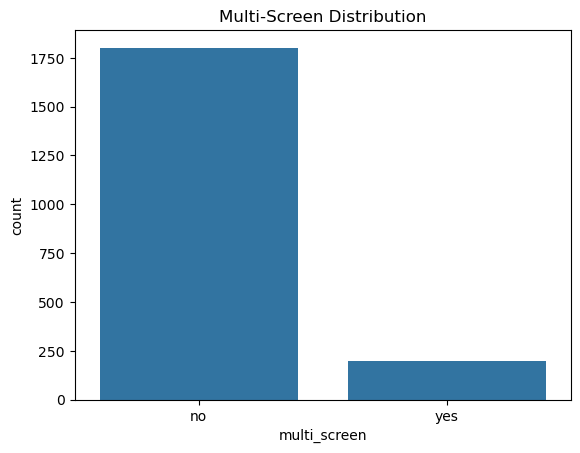

In [48]:
# Frequency Distribution
multi_screen_counts = churn_df['multi_screen'].value_counts()
print("Multi-Screen Frequency:\n", multi_screen_counts)

# Plot the Distribution
sns.countplot(x='multi_screen', data=churn_df)
plt.title('Multi-Screen Distribution')
plt.show()


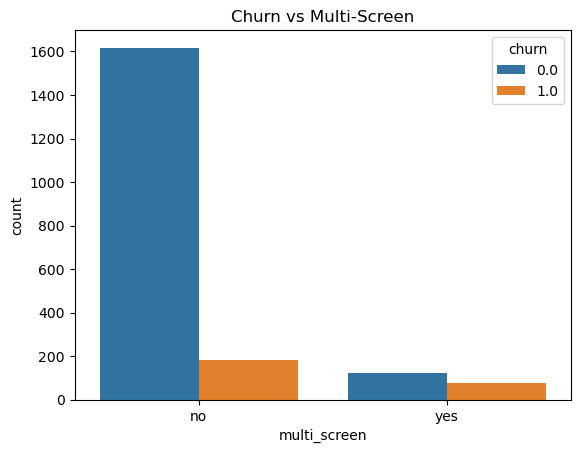

In [49]:
# Churn vs Multi-Screen
sns.countplot(x='multi_screen', hue='churn', data=churn_df)
plt.title('Churn vs Multi-Screen')
plt.show()

Mail Subscribed Frequency:
 no     1430
yes     570
Name: mail_subscribed, dtype: int64


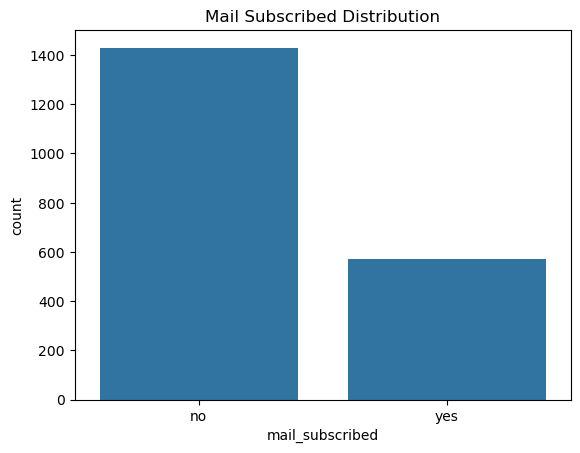

In [50]:
# Frequency Distribution
mail_subscribed_counts = churn_df['mail_subscribed'].value_counts()
print("Mail Subscribed Frequency:\n", mail_subscribed_counts)

# Plot the Distribution
sns.countplot(x='mail_subscribed', data=churn_df)
plt.title('Mail Subscribed Distribution')
plt.show()


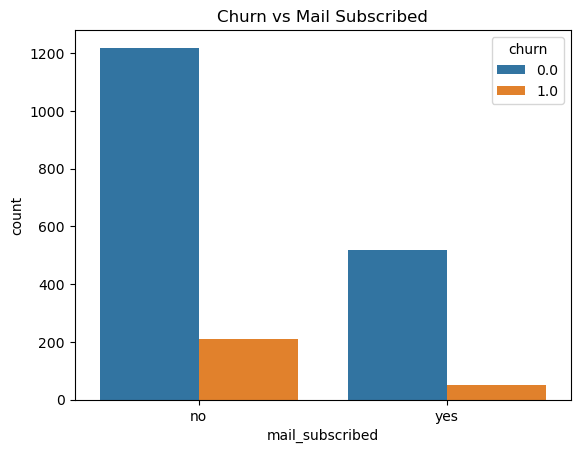

In [51]:
# Churn vs Mail Subscribed
sns.countplot(x='mail_subscribed', hue='churn', data=churn_df)
plt.title('Churn vs Mail Subscribed')
plt.show()


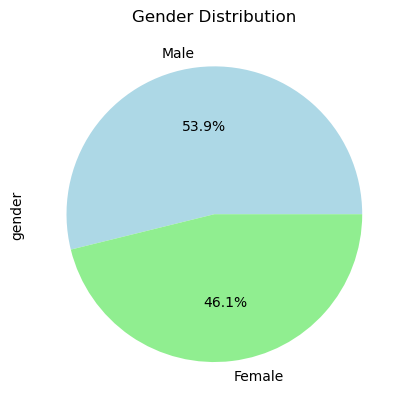

In [52]:
# Pie Chart for Gender Distribution
churn_df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()


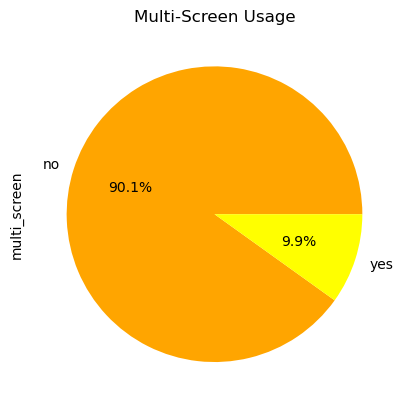

In [53]:

# Pie Chart for Multi-Screen Usage
churn_df['multi_screen'].value_counts().plot.pie(autopct='%1.1f%%', colors=['orange', 'yellow'])
plt.title('Multi-Screen Usage')
plt.show()


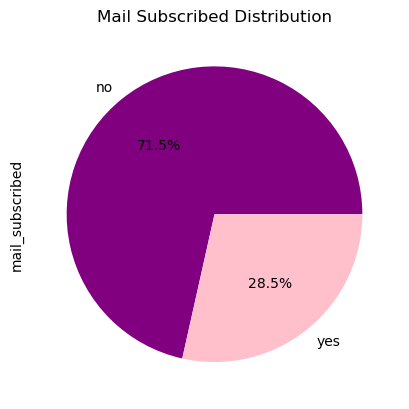

In [54]:
# Pie Chart for Mail Subscription
churn_df['mail_subscribed'].value_counts().plot.pie(autopct='%1.1f%%', colors=['purple', 'pink'])
plt.title('Mail Subscribed Distribution')
plt.show()


In [55]:
churn_gender = pd.crosstab(churn_df['churn'], churn_df['gender'])
print("\nChurn vs Gender:\n", churn_gender)



Churn vs Gender:
 gender  Female  Male
churn               
0.0        797   941
1.0        126   136


# 8. Numerical Column Analysis

In [56]:
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

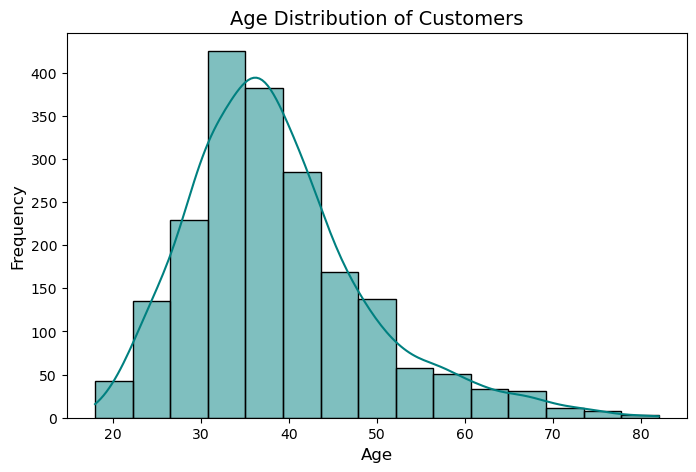

In [99]:
plt.figure(figsize=(8,5))
sns.histplot(churn_df['age'], bins=15, kde=True, color='teal')
plt.title('Age Distribution of Customers', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


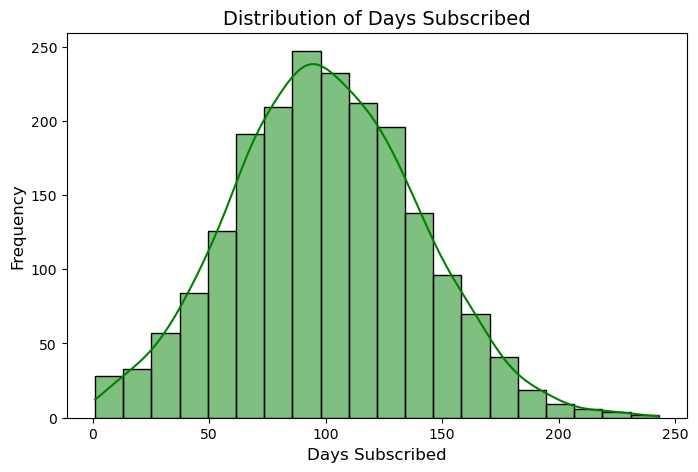

In [100]:
plt.figure(figsize=(8,5))
sns.histplot(churn_df['no_of_days_subscribed'], bins=20, kde=True, color='green')
plt.title('Distribution of Days Subscribed', fontsize=14)
plt.xlabel('Days Subscribed', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


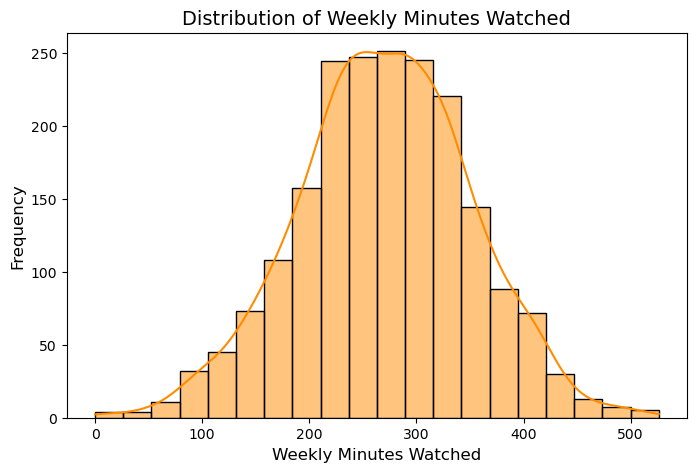

In [101]:
plt.figure(figsize=(8,5))
sns.histplot(churn_df['weekly_mins_watched'], bins=20, kde=True, color='darkorange')
plt.title('Distribution of Weekly Minutes Watched', fontsize=14)
plt.xlabel('Weekly Minutes Watched', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


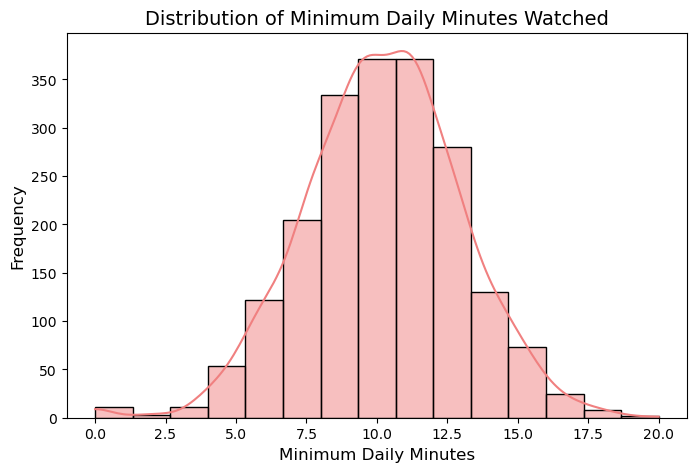

In [102]:
plt.figure(figsize=(8,5))
sns.histplot(churn_df['minimum_daily_mins'], bins=15, kde=True, color='lightcoral')
plt.title('Distribution of Minimum Daily Minutes Watched', fontsize=14)
plt.xlabel('Minimum Daily Minutes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


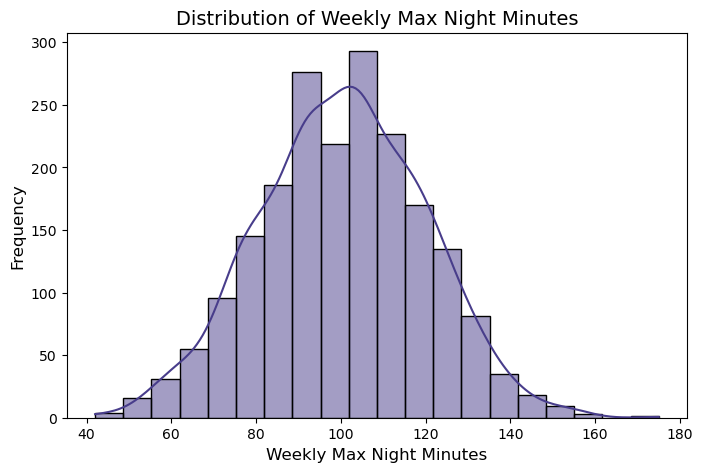

In [103]:
plt.figure(figsize=(8,5))
sns.histplot(churn_df['weekly_max_night_mins'], bins=20, kde=True, color='darkslateblue')
plt.title('Distribution of Weekly Max Night Minutes', fontsize=14)
plt.xlabel('Weekly Max Night Minutes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


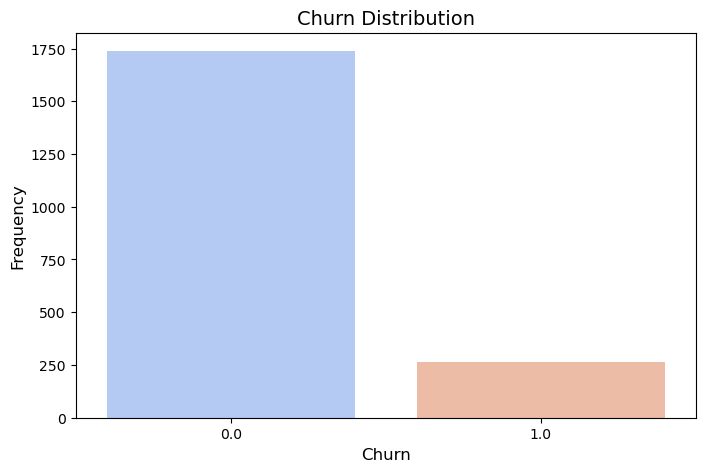

In [105]:
plt.figure(figsize=(8,5))
sns.countplot(x='churn', data=churn_df, palette='coolwarm')
plt.title('Churn Distribution', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


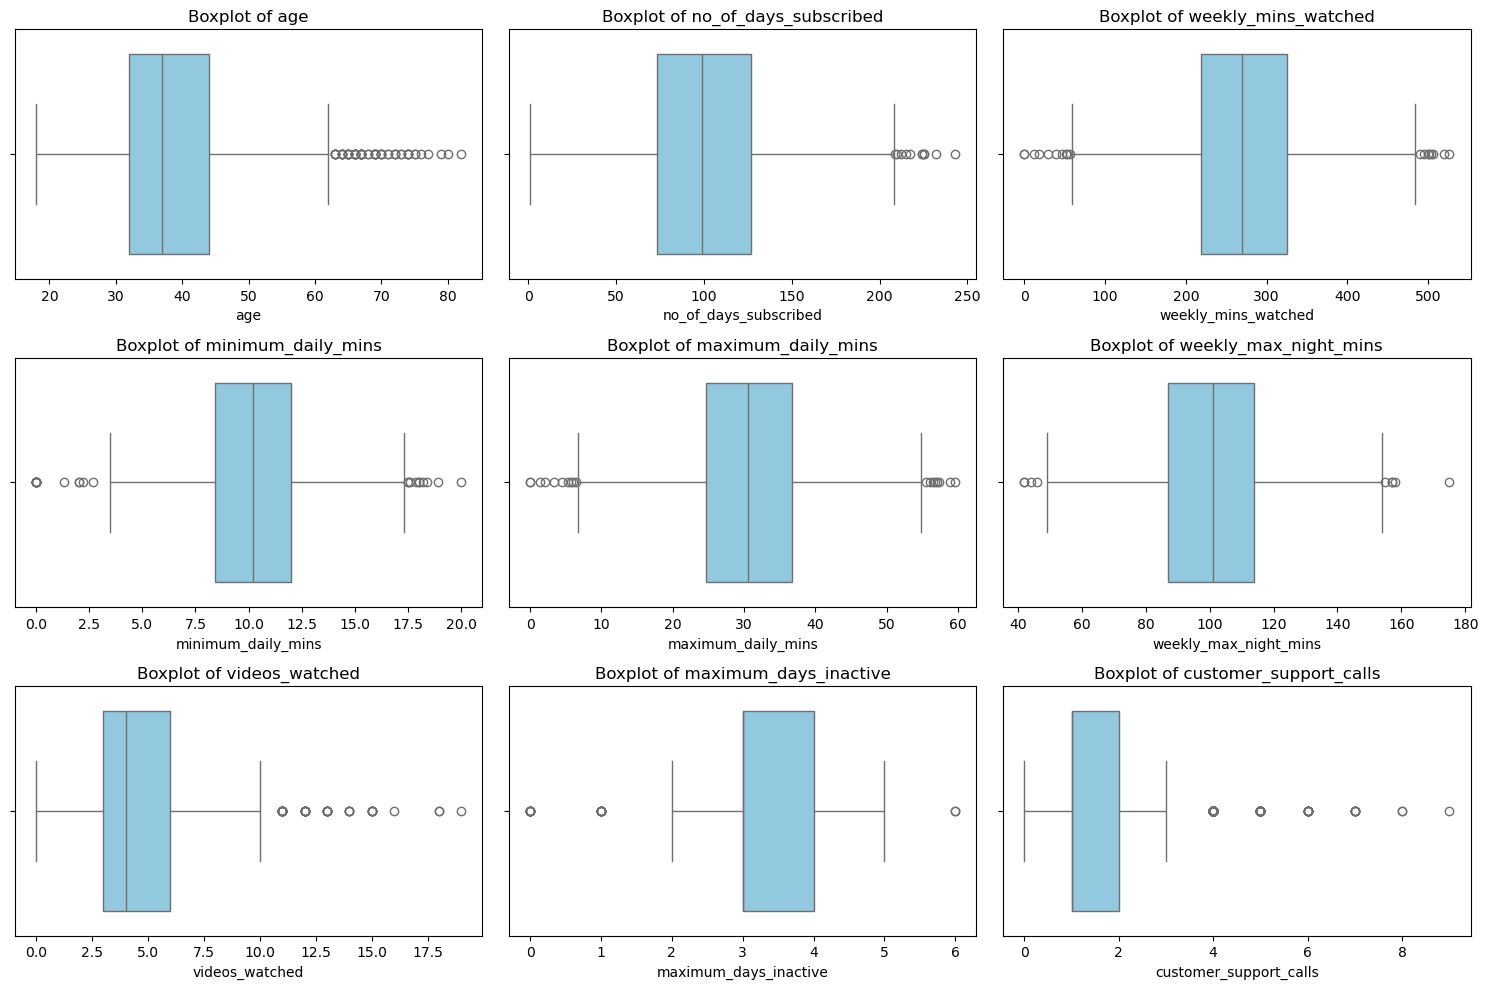

In [106]:
# Create boxplots for selected numerical columns
numerical_cols = ['age', 'no_of_days_subscribed', 'weekly_mins_watched', 
                  'minimum_daily_mins', 'maximum_daily_mins', 
                  'weekly_max_night_mins', 'videos_watched', 
                  'maximum_days_inactive', 'customer_support_calls']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=churn_df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
plt.tight_layout()
plt.show()


# 9. Outliers Analysis

In [79]:
# Extract prevailing_wage column
churn_data = churn_df['churn']

# Calculate the 1st and 3rd quartile
q1 = round(np.quantile(churn_data, 0.25), 2)
q3 = round(np.quantile(churn_data, 0.75), 2)

# Compute the IQR and the lower and upper bounds
IQR = q3 - q1
lb = q1 - 1.5 * IQR
ub = q3 + 1.5 * IQR

# Calculate the median
median = churn_data.median()

# Replace outliers with the median using list comprehension
new_data = [median if (i < lb or i > ub) else i for i in churn_data]

# Add the new data as a column to the DataFrame
churn_df['nchurn'] = new_data

# Check the results
print(churn_df[['churn', 'nchurn']].head())

   churn  nchurn
0    0.0     0.0
1    0.0     0.0
2    1.0     0.0
3    0.0     0.0
4    0.0     0.0


In [80]:
# Extract prevailing_wage column
churn_data = churn_df['churn']

# Calculate the 1st and 3rd quartile
q1 = round(np.quantile(churn_data, 0.25), 2)
q3 = round(np.quantile(churn_data, 0.75), 2)

# Compute the IQR and the lower and upper bounds
IQR = q3 - q1
lb = q1 - 1.5 * IQR
ub = q3 + 1.5 * IQR

# Calculate the median
median = churn_data.median()

# Use np.where() to replace outliers with the median
churn_df['churn_1'] = np.where((churn_df['churn'] < lb) | (churn_df['churn'] > ub),
                               median, 
                               churn_df['churn'])

# Check the results
print(churn_df[['churn', 'churn_1']].head())

   churn  churn_1
0    0.0      0.0
1    0.0      0.0
2    1.0      0.0
3    0.0      0.0
4    0.0      0.0


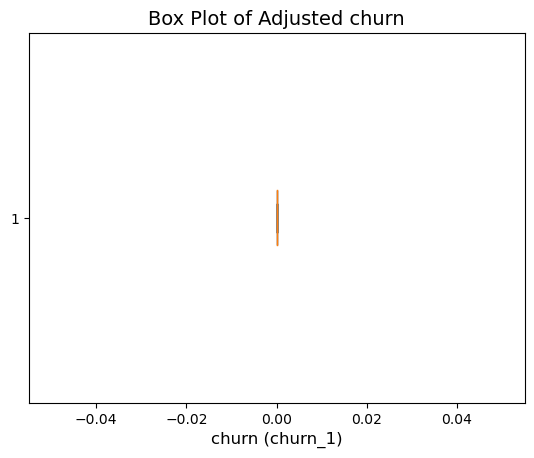

In [82]:
# Create a horizontal box plot for the 'p_wage_1' column
plt.boxplot(churn_df['churn_1'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'))

# Add title and labels for better clarity
plt.title('Box Plot of Adjusted churn', fontsize=14)
plt.xlabel('churn (churn_1)', fontsize=12)

# Display the box plot
plt.show()

# 10. The correlation between numerical columns

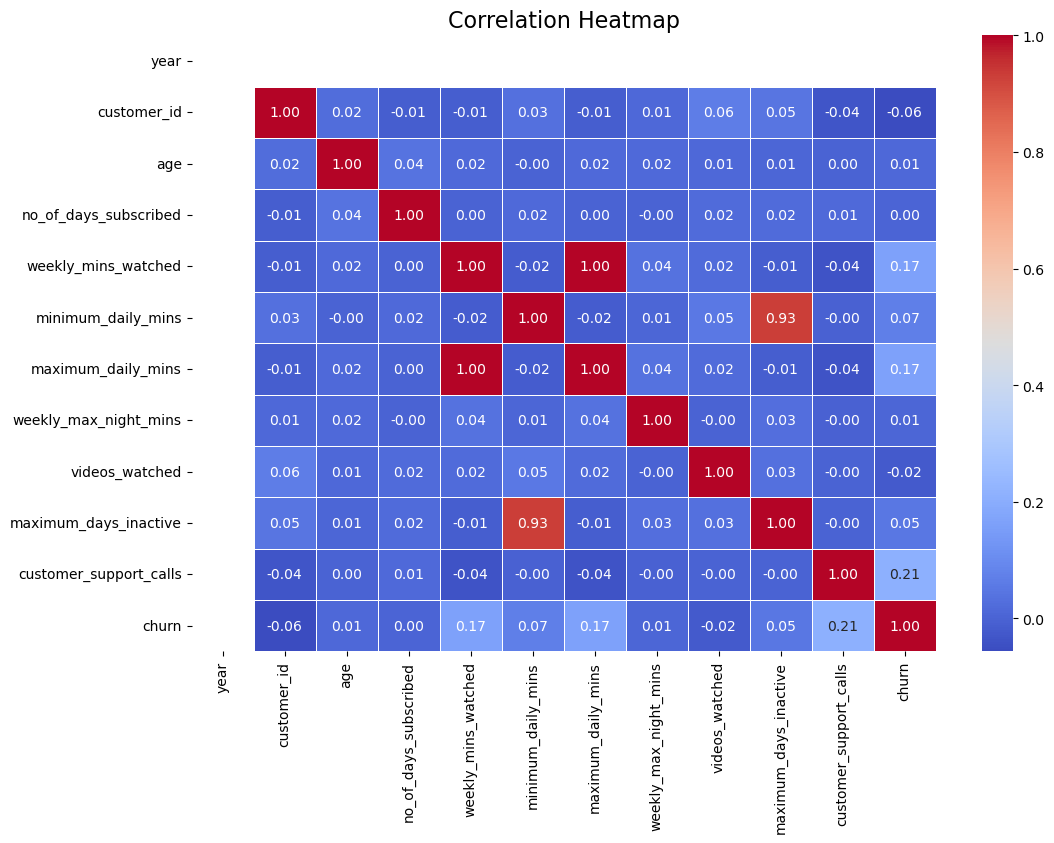

In [3]:
warnings.filterwarnings("ignore")
correlation_matrix = churn_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


# 11. Convert Categorical To Numerical

In [88]:
cat

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in cat:
    churn_df[column] = le.fit_transform(churn_df[column])
(churn_df)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,nchurn,churn_1
0,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0,0.0,0.0
1,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0,0.0,0.0
2,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0,0.0,0.0
3,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0,0.0,0.0
4,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,54,75,0,1,182.25,11.3,20.66,97,5,4.0,2,0.0,0.0,0.0
1996,1,45,127,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0,0.0,0.0
1997,1,53,94,0,0,128.85,15.6,14.60,110,16,5.0,0,0.0,0.0,0.0
1998,1,40,94,0,0,178.05,10.4,20.18,100,6,3.0,3,0.0,0.0,0.0


# 12. Scaling the data

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
churn_df_scaled = pd.DataFrame(scaler.fit_transform(churn_df), columns=churn_df.columns)

In [118]:
churn_df_scaled

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,nchurn,churn_1
0,0.0,0.281250,0.252066,0.0,0.0,0.281927,0.610,0.281858,0.300752,0.052632,0.666667,0.111111,0.0,0.0,0.0
1,0.0,0.328125,0.611570,0.0,0.0,0.559578,0.385,0.559524,0.338346,0.157895,0.500000,0.222222,0.0,0.0,0.0
2,0.0,0.734375,0.516529,0.0,0.0,0.165906,0.595,0.165828,0.368421,0.052632,0.666667,0.555556,1.0,0.0,0.0
3,0.0,0.093750,0.537190,0.0,1.0,0.610604,0.475,0.610496,0.451128,0.210526,0.500000,0.333333,0.0,0.0,0.0
4,0.0,0.343750,0.785124,0.0,0.0,0.461802,0.545,0.461771,0.308271,0.368421,0.500000,0.111111,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.562500,0.305785,0.0,1.0,0.346351,0.565,0.346412,0.413534,0.263158,0.666667,0.222222,0.0,0.0,0.0
1996,1.0,0.421875,0.520661,0.0,0.0,0.519669,0.465,0.519618,0.556391,0.157895,0.500000,0.111111,0.0,0.0,0.0
1997,1.0,0.546875,0.384298,0.0,0.0,0.244869,0.780,0.244802,0.511278,0.842105,0.833333,0.000000,0.0,0.0,0.0
1998,1.0,0.343750,0.384298,0.0,0.0,0.338369,0.520,0.338364,0.436090,0.315789,0.500000,0.333333,0.0,0.0,0.0
